<a href="https://colab.research.google.com/github/galihwangiputri/customer-churn/blob/main/Business_Decision_Research2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

* Import, 
* Preview, 
* Get Info, 
* Summary Statistics

In [44]:
import pandas as pd

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [45]:
print('\nInfo dataset:')
print(df.info())

print('\nSummary Statistik Data:')
df.describe()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None

Summary Statistik Data:


,no,Row_Num,Customer_ID,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,50000.500000,50000.500000,193083.996940,1.492184e+12,1.509970e+12,1.373157e+06,11.698500
std,28867.657797,28867.657797,200747.292955,3.948432e+10,3.563295e+10,1.544435e+06,35.417324
min,1.000000,1.000000,654.000000,1.362729e+12,1.362729e+12,0.000000e+00,1.000000
25%,25000.750000,25000.750000,60994.500000,1.467106e+12,1.491482e+12,4.783038e+05,1.000000
50%,50000.500000,50000.500000,121441.000000,1.499012e+12,1.518611e+12,9.059370e+05,2.000000
75%,75000.250000,75000.250000,196023.000000,1.523675e+12,1.539695e+12,1.636372e+06,6.000000
max,100000.000000,100000.000000,846213.000000,1.549061e+12,1.549065e+12,4.881014e+07,3852.000000


In [46]:
print('Missing Value on Column:')
df.isnull().sum()

Missing Value on Column:


no                            0
Row_Num                       0
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64

## Data Cleansing
*  **Drop unnecessary columns**

    `no` and `Row_Num` columns have no special meaning. So it can be removed

*  **Convert Data Type**  
    Ensure correct data type for each columns (variable).
*  **Create New Column**, if needed
*  **Convert Categorical Column to Numerical Column**



Drop Column

In [47]:
# Drop Column
del df['no']
del df['Row_Num']

Convert Data Type Column

In [48]:
# Convert Data Type on Column 'First_Transaction' and 'Last_Transaction'
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

Add a new necessary column.

In [49]:
# New Column 'Year'
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

In [50]:
# Kategorisasi rata-rata besar transaksi
def transaction_group(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(transaction_group, axis=1)

In [51]:
# Get Date Churn: Six months before last transaction
from dateutil.relativedelta import relativedelta

date_last_transaction = df['Last_Transaction'].max()
six_month_before = date_last_transaction - relativedelta(months=6)
print("Last Transaction Dataset: ", date_last_transaction)
print("Six month before: ", six_month_before)

Last Transaction Dataset:  2019-02-01 23:57:57.286000013
Six month before:  2018-08-01 23:57:57.286000013


In [52]:
# Define Column 'is_churn': Categorized customer churn or not
df.loc[df['Last_Transaction'] > six_month_before, 'is_churn'] = False
df.loc[df['Last_Transaction'] < six_month_before, 'is_churn'] = True

In [53]:
# Preview last Dataset
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Year_First_Transaction,Year_Last_Transaction,Average_Transaction_Amount_Group,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,2016,2018,5. >1.000.000 - 2.500.000,False
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,2014,2018,5. >1.000.000 - 2.500.000,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,2017,2019,2. >250.000 - 500.000,False
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,2017,2019,3. >500.000 - 750.000,False
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,2015,2018,5. >1.000.000 - 2.500.000,False


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       100000 non-null  int64         
 1   Product                           100000 non-null  object        
 2   First_Transaction                 100000 non-null  datetime64[ns]
 3   Last_Transaction                  100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount        100000 non-null  int64         
 5   Count_Transaction                 100000 non-null  int64         
 6   Year_First_Transaction            100000 non-null  int64         
 7   Year_Last_Transaction             100000 non-null  int64         
 8   Average_Transaction_Amount_Group  100000 non-null  object        
 9   is_churn                          100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), o

In [55]:
# # Outlier
# import matplotlib.pyplot as plt

# df.drop(['is_churn', 'First_Transaction', 'Last_Transaction'], axis=1).plot(kind='box', 
#                                                                                   subplots=True, 
#                                                                                   layout=(2,4), 
#                                                                                   # sharex=False, 
#                                                                                   # sharey=False, 
#                                                                                   figsize=(15,9), 
#                                                                                   title='Box Plot for each input variable')
# plt.show()

## Data Visualization

* Number of Customers per Year
* Number of Transaction per Year
* Number of Average_Amount_Transaction per Year
* Trend of Product per Year

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

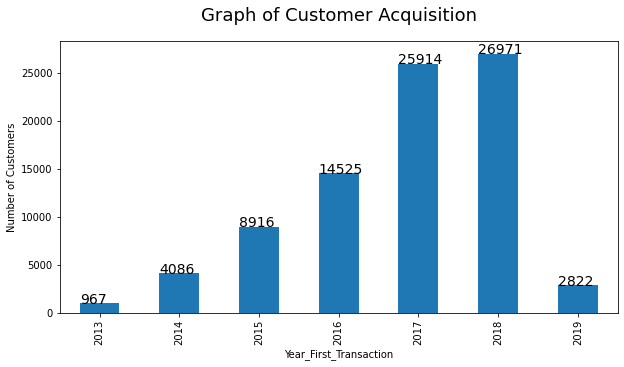

In [57]:
# Bar Chart: Number of Customer per Year
df_year_customer = df.groupby('Year_First_Transaction')['Customer_ID'].nunique()

plt.figure(figsize=(10,5))
df_year_customer.plot(kind='bar')
plt.title('Graph of Customer Acquisition', fontsize=18, pad=20)
plt.xlabel('Year_First_Transaction')
plt.ylabel('Number of Customers')
for index, data in enumerate(df_year_customer):
  plt.text(index-0.25, data, str(data), fontsize=14)
plt.show()

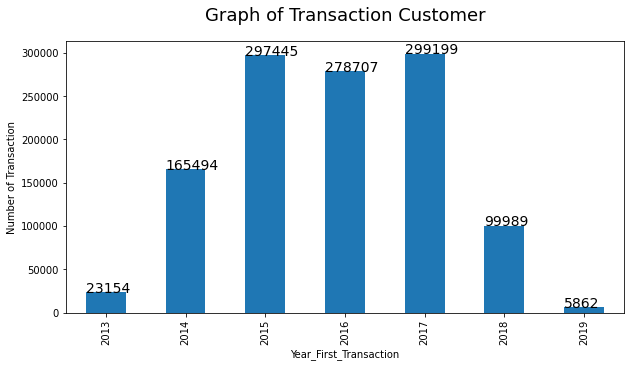

In [58]:
# Bar Chart: Number of Transaction per Year
df_year_transaction = df.groupby('Year_First_Transaction')['Count_Transaction'].sum()

plt.figure(figsize=(10,5))
df_year_transaction.plot(kind='bar')
plt.title('Graph of Transaction Customer', fontsize=18, pad=20)
for index, data in enumerate(df_year_transaction):
  plt.text(index-0.25, data, str(data), fontsize=14)
plt.xlabel('Year_First_Transaction')
plt.ylabel('Number of Transaction')
plt.show()

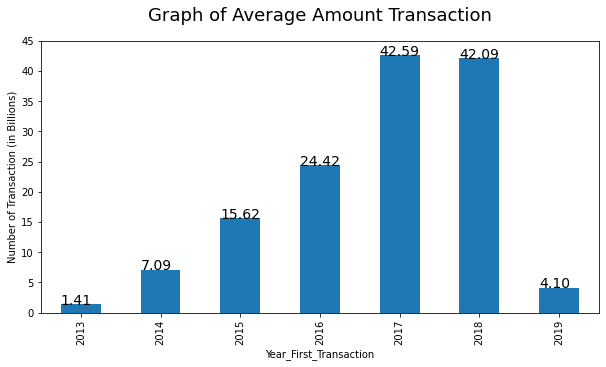

In [59]:
# Bar Chart: Number of Average_Amount_Transaction per Year
df_year_avgtransaction = df.groupby('Year_First_Transaction')['Average_Transaction_Amount'].sum()

plt.figure(figsize=(10,5))
df_year_avgtransaction.plot(kind='bar')
plt.title('Graph of Average Amount Transaction',  fontsize=18, pad=20)
plt.xlabel('Year_First_Transaction')
plt.ylabel('Number of Transaction (in Billions)')
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype('int64'))
for index, data in enumerate(df_year_avgtransaction):
  plt.text(index-0.25, data, '{:.2f}'.format(data/1000000000), fontsize=14)
plt.show()

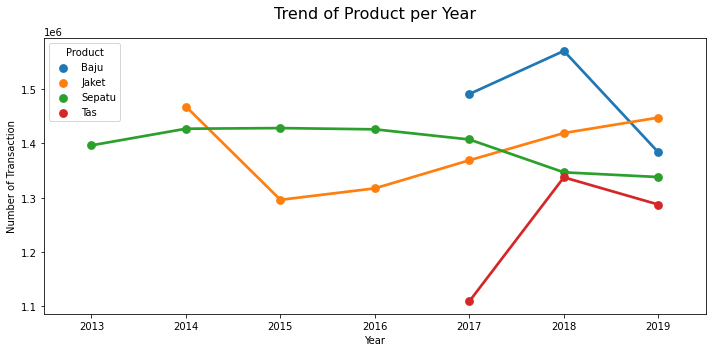

In [60]:
# Point Plot: Trend of Product per Year
df_year_product = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index()

plt.figure(figsize=(10,5))
sns.pointplot(data = df_year_product,
              x='Year_First_Transaction',
              y='Average_Transaction_Amount',
              hue='Product')
plt.title('Trend of Product per Year', fontsize=16, pad=20)
plt.xlabel('Year')
plt.ylabel('Number of Transaction')
plt.tight_layout()
plt.show()

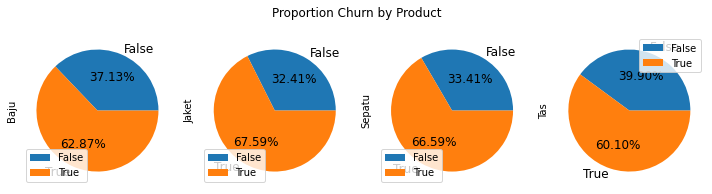

In [61]:
# Pie Plot: Plot Customer Churn per Product
# Pivot table is_churn and Product
dfpv_churn_prod = df.pivot_table(index='is_churn',
                                    columns='Product',
                                    values='Customer_ID',
                                    aggfunc='nunique',
                                    fill_value=0)
dfpv_churn_prod.plot.pie(subplots=True,
                         figsize=(10,3),
                         autopct='%0.2f%%',
                         title='Proportion Churn by Product',
                         fontsize=12)
plt.tight_layout()
plt.show()

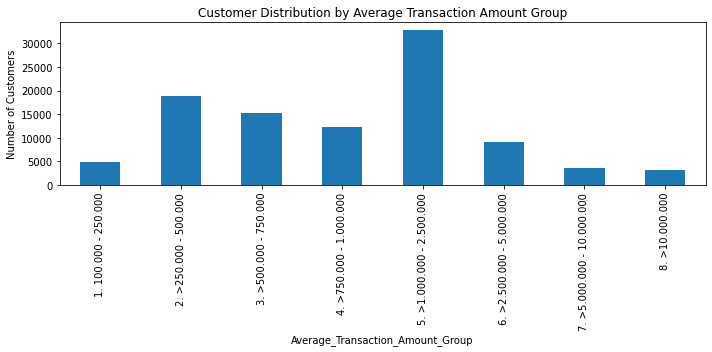

In [62]:
# Bar Chart: Customer Distribution by Avg Transaction Amount Group
plt.figure(figsize=(10,5))
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

## Modelling

**Convert Categorical Column to Numeric Column**

In [63]:
df_cat = df.select_dtypes(include='object')
print(df_cat.columns)
# print(df_cat.apply(lambda col: col.unique()))

Index(['Product', 'Average_Transaction_Amount_Group', 'is_churn'], dtype='object')


In [64]:
# Convert Categorical Column

# Column Product 
df['Product'] = df['Product'].astype('category')
dict_product = dict(enumerate(df['Product'].cat.categories))
df['Product'] = df['Product'].cat.codes
# Column is_churn
df['is_churn'] = df['is_churn'].astype('category')
dict_is_churn = dict(enumerate(df['is_churn'].cat.categories))
df['is_churn'] = df['is_churn'].cat.codes
# Column Average_Transaction_Amount_Group
df['Average_Transaction_Amount_Group'] = df['Average_Transaction_Amount_Group'].astype('category')
dict_is_churn = dict(enumerate(df['Average_Transaction_Amount_Group'].cat.categories))
df['Average_Transaction_Amount_Group'] = df['Average_Transaction_Amount_Group'].cat.codes

In [65]:
dict_product

{0: 'Baju', 1: 'Jaket', 2: 'Sepatu', 3: 'Tas'}

In [ ]:
# Rearrange Columns Order (is_churn in last column)
df = df.reindex(['Customer_ID', 'Product', 'First_Transaction', 'Last_Transaction',
       'Average_Transaction_Amount', 'Count_Transaction',
       'Year_First_Transaction', 'Year_Last_Transaction',
       'Average_Transaction_Amount_Group', 'is_churn'], axis=1)

In [ ]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Year_First_Transaction,Year_Last_Transaction,Average_Transaction_Amount_Group,is_churn
0,29531,1,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,2016,2018,4,0
1,29531,2,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,2014,2018,4,0
2,141526,3,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,2017,2019,1,0
3,141526,1,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,2017,2019,2,0
4,37545,2,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,2015,2018,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       100000 non-null  int64         
 1   Product                           100000 non-null  int8          
 2   First_Transaction                 100000 non-null  datetime64[ns]
 3   Last_Transaction                  100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount        100000 non-null  int64         
 5   Count_Transaction                 100000 non-null  int64         
 6   Year_First_Transaction            100000 non-null  int64         
 7   Year_Last_Transaction             100000 non-null  int64         
 8   Average_Transaction_Amount_Group  100000 non-null  int8          
 9   is_churn                          100000 non-null  int8          
dtypes: datetime64[ns](2), int64(5), i



**Correlation Between Variables**


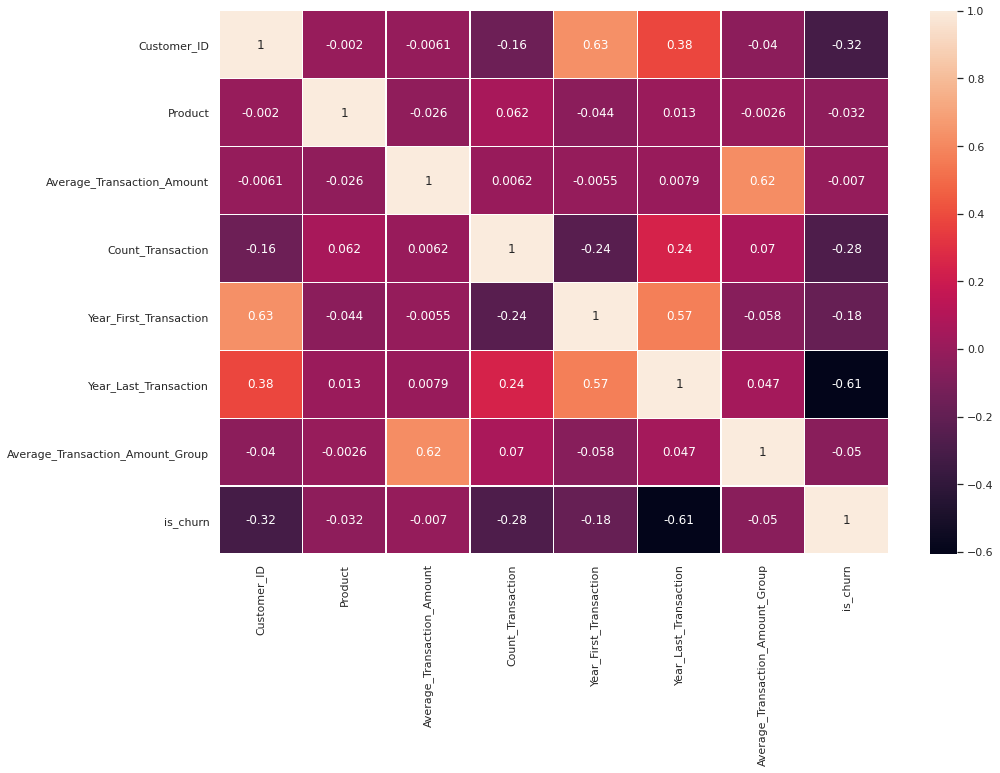

In [ ]:
# Correlation between variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(df.corr(), linewidths=.5, annot=True)

**Build and Compare Models**
* Logistic Regression
    
    "**Why?**" Logistic Regression for classification problem
* Decision Tree
* K-Nearest Neighbour

In [ ]:
# Model 1: X except ('is_churn', 'First_Transaction', 'Last_Transaction') , Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Feature and Target columns 
X = df.drop(columns=['is_churn', 'First_Transaction', 'Last_Transaction'])
y = df['is_churn']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initiate Model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Predict Model
y_pred = logreg.predict(X_test)

# Evaluate Model with Confusion Matrix
cnf_matrix = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', cnf_matrix)
cr = classification_report(y_pred, y_test)
print('Classification Report:\n', cr)

Confusion Matrix:
 [[ 2542  1100]
 [ 5748 15610]]
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.70      0.43      3642
           1       0.93      0.73      0.82     21358

    accuracy                           0.73     25000
   macro avg       0.62      0.71      0.62     25000
weighted avg       0.84      0.73      0.76     25000



In [ ]:
# Model 2: X except ('is_churn', 'First_Transaction', 'Last_Transaction', 'Year_Last_Transaction', 'Customer_ID'), Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Feature and Target columns 
X = df.drop(columns=['is_churn', 'First_Transaction', 'Last_Transaction', 'Year_Last_Transaction', 'Customer_ID'])
y = df['is_churn']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initiate Model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Predict Model
y_pred = logreg.predict(X_test)

# Evaluate Model with Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)
cr = classification_report(y_pred, y_test)
print('Classification Report:\n', cr)

Confusion Matrix:
 [[    0  8290]
 [    0 16710]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80     25000

    accuracy                           0.67     25000
   macro avg       0.50      0.33      0.40     25000
weighted avg       1.00      0.67      0.80     25000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Model 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Feature and Target columns 
X = df.drop(columns=['is_churn', 'First_Transaction', 'Last_Transaction'])
y = df['is_churn']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initiate Model
decitree = DecisionTreeClassifier()

# Fit the model with data
decitree.fit(X_train, y_train)

# Predict Model
y_pred = decitree.predict(X_test)

# Evaluate Model with Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)
cr = classification_report(y_pred, y_test)
print('Classification Report:\n', cr)

Confusion Matrix:
 [[ 6531  1759]
 [ 1757 14953]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      8288
           1       0.89      0.89      0.89     16712

    accuracy                           0.86     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.86      0.86      0.86     25000



In [ ]:
# Model 3: K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Feature and Target columns 
X = df.drop(columns=['is_churn', 'First_Transaction', 'Last_Transaction'])
y = df['is_churn']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initiate Model
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model with data
knn.fit(X_train, y_train)

# Predict Model
y_pred = knn.predict(X_test)

# Evaluate Model with Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)
cr = classification_report(y_pred, y_test)
print('Classification Report:\n', cr)


Confusion Matrix:
 [[ 2996  5294]
 [ 1801 14909]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.62      0.46      4797
           1       0.89      0.74      0.81     20203

    accuracy                           0.72     25000
   macro avg       0.63      0.68      0.63     25000
weighted avg       0.79      0.72      0.74     25000

